if you run this notebook yourself, you probably have to change this first cell:

In [ ]:
cd ../labs/observing_session_Sep29/14inch/

In [2]:
from astropy.io import fits

# Offsets

We measured the centers of Jupiter in two images in this video: https://www.youtube.com/watch?v=MWe-n85YuJQ

 * jupiter_40ms_I002 261.7 303.8
 * jupiter_40ms_V005 256.7 329.7

In [3]:
im1 = fits.getdata('Jupiter/jupiter_40ms_I002.FIT')*fits.getheader('Jupiter/jupiter_40ms_I002.FIT')['EGAIN']
im2 = fits.getdata('Jupiter/jupiter_40ms_V005.FIT')*fits.getheader('Jupiter/jupiter_40ms_V005.FIT')['EGAIN']

In [4]:
%matplotlib inline
import pylab as pl
import numpy as np

In [5]:
from astropy.visualization import simple_norm

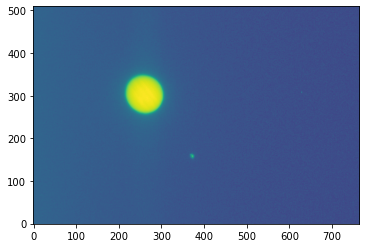

In [6]:
pl.imshow(im1, origin='lower', norm=simple_norm(im1, stretch='log'))

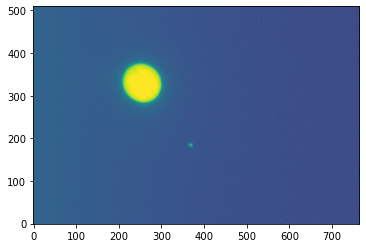

In [7]:
pl.imshow(im2, origin='lower', norm=simple_norm(im1, stretch='log'))

We can see how far they're shifted by taking their difference (even though they're in different bands)

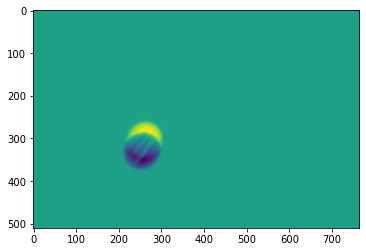

In [8]:
pl.imshow(im1-im2)

We can also see this by zooming in:

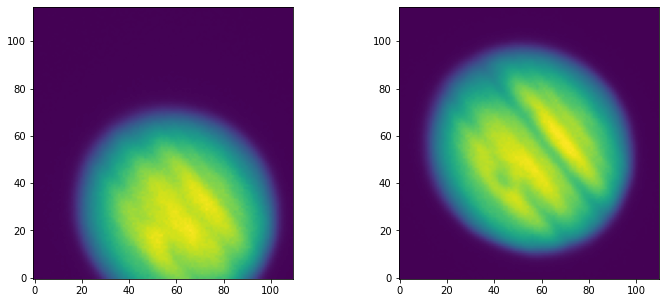

In [9]:
pl.figure(figsize=(12,5))
pl.subplot(1,2,1).imshow(im1[275:390,200:310], origin='lower')
pl.subplot(1,2,2).imshow(im2[275:390,200:310], origin='lower')

We can fix this using `np.roll` to shift the images:

We take one image as the _reference_, which we will not shift.  The other one, we will shift.

The difference between the images is the difference in their X, Y coordinates

In [10]:
# the reference ("ref") image will be V-band (im2):
refx, refy = 256.7, 329.7
# the to-be-shifted image (im1) is centered at:
cx, cy = 261.7, 303.8

In [11]:
dx = refx - cx
dy = refy - cy

We have to round these numbers to the nearest integer:

In [12]:
dx = round(dx)
dy = round(dy)

In [13]:
# we shift the image along two axes, first y (axis 0), then x (axis 1)
shifted_im1 = np.roll(im1, dy, axis=0)
shifted_im1 = np.roll(shifted_im1, dx, axis=1)

Now we can compare them side-by-side again (but this time we replace `im1` with `shifted_im1`)

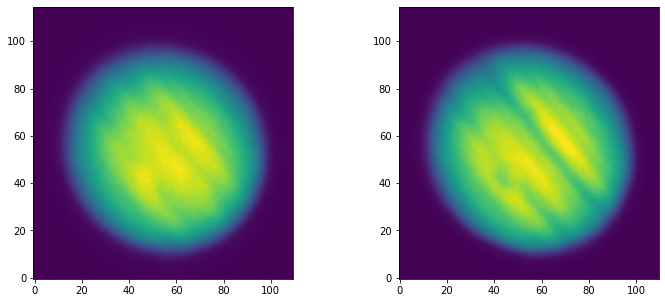

In [14]:
pl.figure(figsize=(12,5))
pl.subplot(1,2,1).imshow(shifted_im1[275:390,200:310], origin='lower')
pl.subplot(1,2,2).imshow(im2[275:390,200:310], origin='lower')

We can also check the difference:

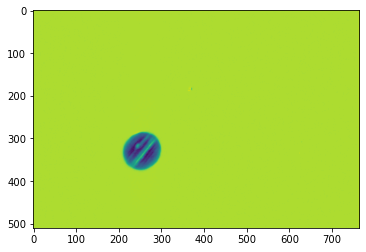

In [15]:
pl.imshow(shifted_im1-im2)

It looks funky, but there's no longer an obvious offset.

If we want to save the result, we can do that:

In [16]:
header = fits.getheader('Jupiter/jupiter_40ms_I002.FIT')
fh = fits.PrimaryHDU(data=shifted_im1, header=header)
fh.writeto("Jupiter/jupiter_40ms_I002_shifted.FIT", overwrite=True)